## Exoplanet Classification
### Practical I - Machine Learning

The goal of this practical is to practice the concepts studied during the module and to acquire experience in the use of some of the main classification methods, model evaluation and interpretation and presentation of experimental results. A comparison of multiple classification methods based on different principles in a binary classification problem regarding exoplanet candidates.

Task: Comparing six classification methods
- Naive Bayes
- Decision Tree
- SVM
- k-NN
- Random Forest
- Gradient Tree Boosting

In [110]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.display import display
from matplotlib import colors
from sklearn import svm
from sklearn import metrics
from sklearn import ensemble
from sklearn import neighbors
from sklearn import feature_selection
from sklearn.model_selection import KFold

In [112]:
#Input file path 
INPUT_FILEPATH = "koi_data.csv"
TARGET = "koi_disposition"
N_FEATURES = 41

# Validation size
VAL_SIZE = 0.2

df = pd.read_csv(INPUT_FILEPATH)
df = df.drop(["kepoi_name"], axis=1)

print("lines: {}".format(df.shape[0]))
print("rows: {}".format(df.shape[1]))
print("Missing data: {}".format(df.isnull().sum().sum()))

# list features
features = list(df.columns)
features.remove(TARGET)
print("Target: {}".format(TARGET))

print("\n InputFile:")
with pd.option_context("max_columns", 6): # Limita o numero de cols mostradas
    display(df.head(10))

lines: 5202
rows: 42
Missing data: 0
Target: koi_disposition

 InputFile:


,koi_disposition,koi_period,koi_impact,...,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,CONFIRMED,9.48804,0.146,...,0.080,0.310,0.320
1,CONFIRMED,54.41838,0.586,...,0.490,0.120,0.500
2,FALSE POSITIVE,1.73695,1.276,...,-0.257,0.099,0.276
3,CONFIRMED,2.52559,0.701,...,0.070,0.020,0.070
4,FALSE POSITIVE,7.36179,1.169,...,-4.537,7.713,8.948
5,CONFIRMED,16.06865,0.052,...,0.005,0.030,0.031
6,CONFIRMED,2.47061,0.818,...,0.015,-0.270,0.270
7,CONFIRMED,3.52250,0.631,...,-0.028,0.176,0.178
8,CONFIRMED,3.70921,0.051,...,0.160,-0.130,0.210
9,FALSE POSITIVE,11.52145,2.483,...,0.147,0.037,0.151


In [113]:
#All features
print("Features:")
for x in features:
    print(x,"\t\t\t\t",end =" ")


Features:
koi_period 				 koi_impact 				 koi_duration 				 koi_depth 				 koi_ror 				 koi_srho 				 koi_prad 				 koi_sma 				 koi_incl 				 koi_teq 				 koi_insol 				 koi_dor 				 koi_max_sngle_ev 				 koi_max_mult_ev 				 koi_model_snr 				 koi_steff 				 koi_slogg 				 koi_smet 				 koi_srad 				 koi_smass 				 koi_kepmag 				 koi_gmag 				 koi_rmag 				 koi_imag 				 koi_zmag 				 koi_jmag 				 koi_hmag 				 koi_kmag 				 koi_fwm_stat_sig 				 koi_fwm_sra 				 koi_fwm_sdec 				 koi_fwm_srao 				 koi_fwm_sdeco 				 koi_fwm_prao 				 koi_fwm_pdeco 				 koi_dicco_mra 				 koi_dicco_mdec 				 koi_dicco_msky 				 koi_dikco_mra 				 koi_dikco_mdec 				 koi_dikco_msky 				 

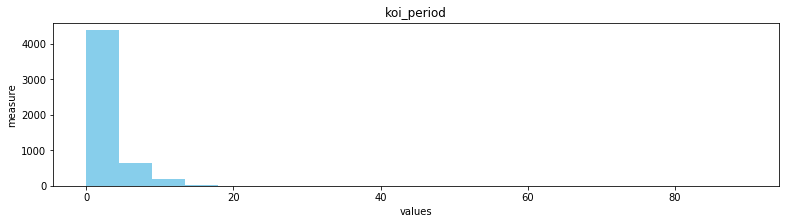

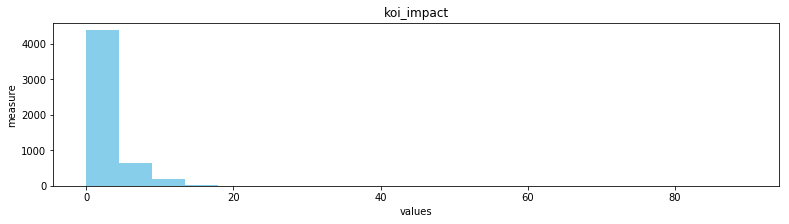

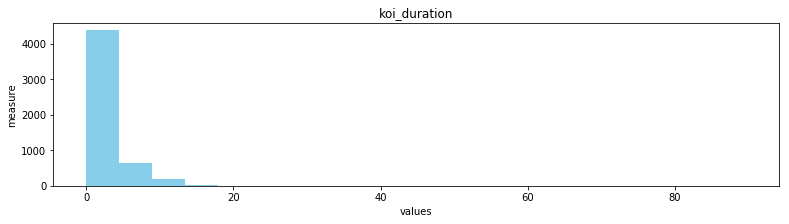

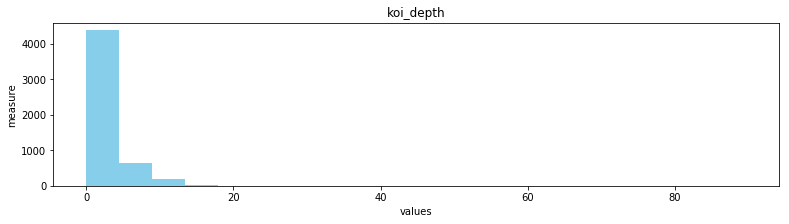

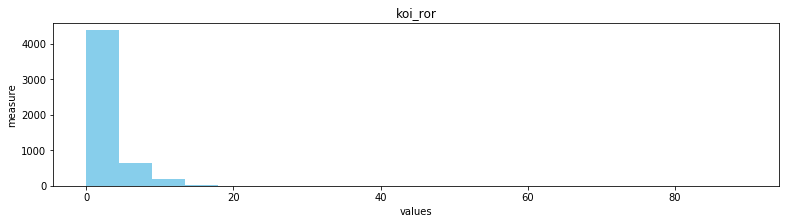

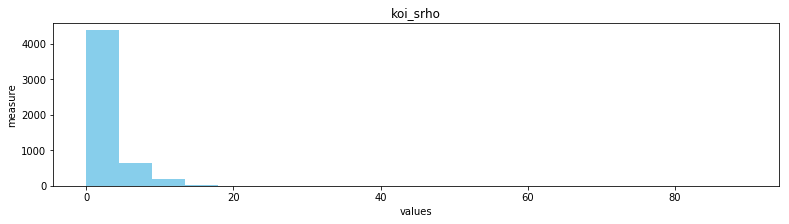

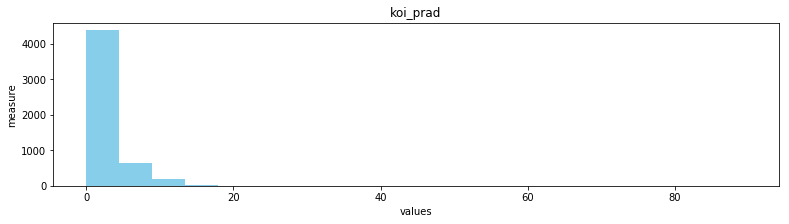

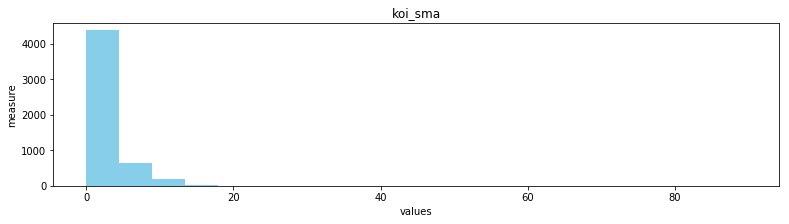

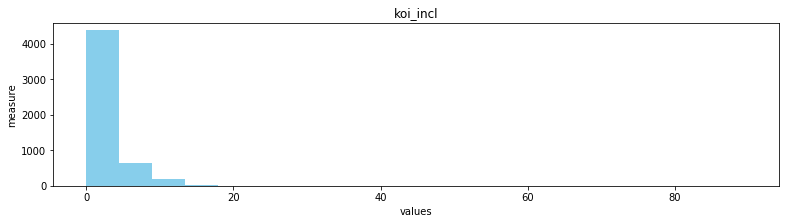

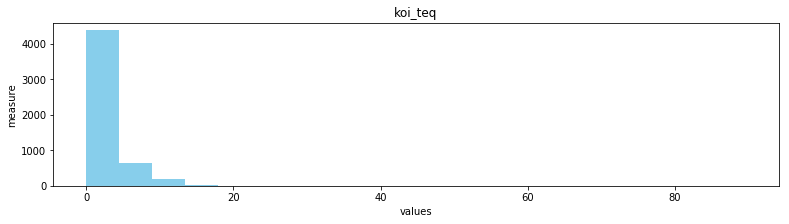

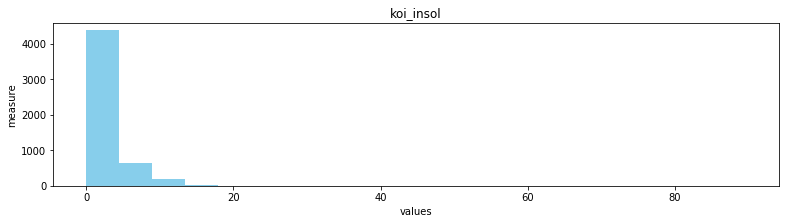

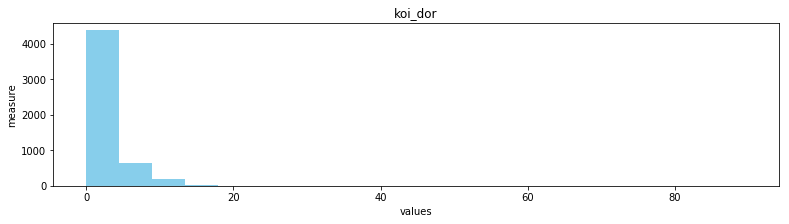

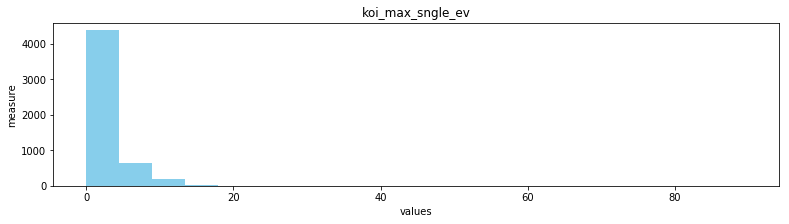

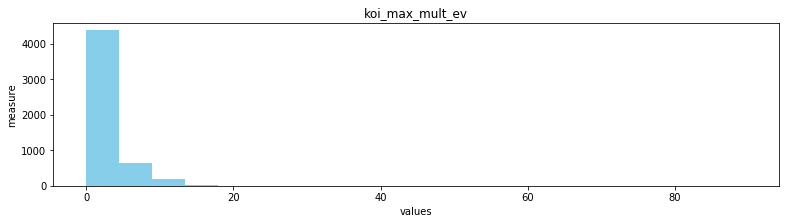

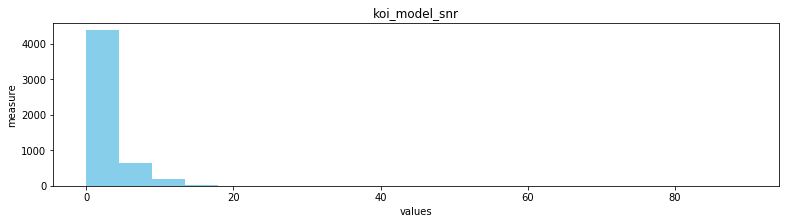

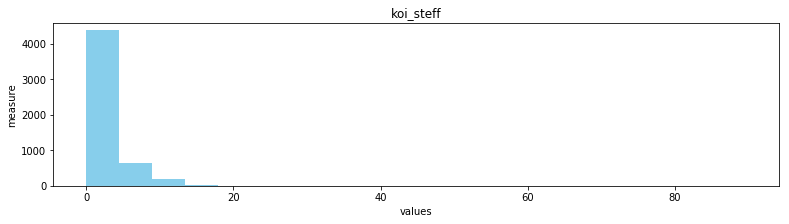

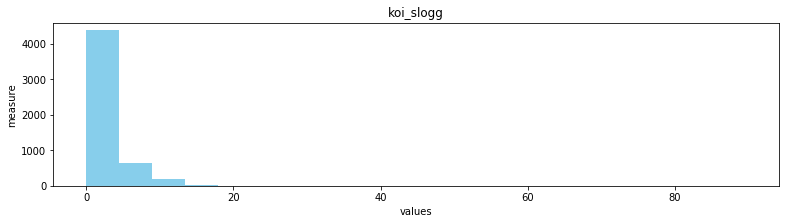

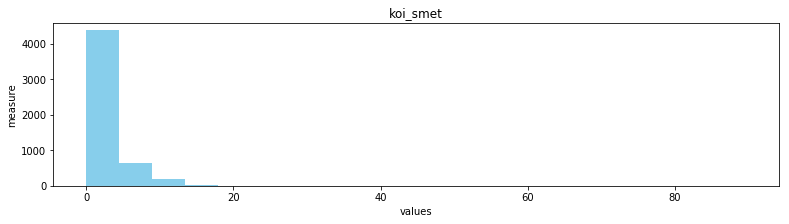

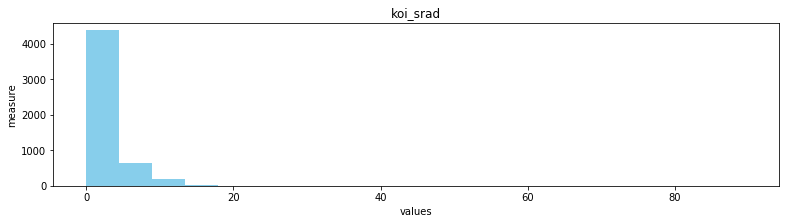

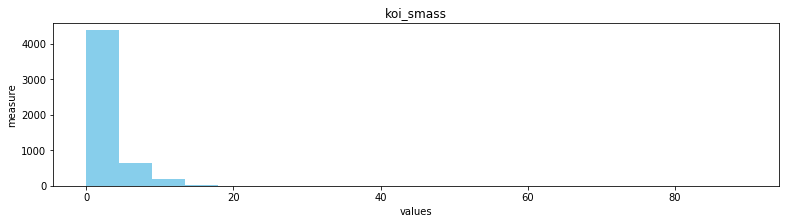

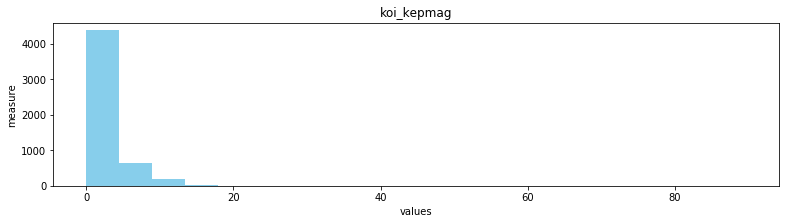

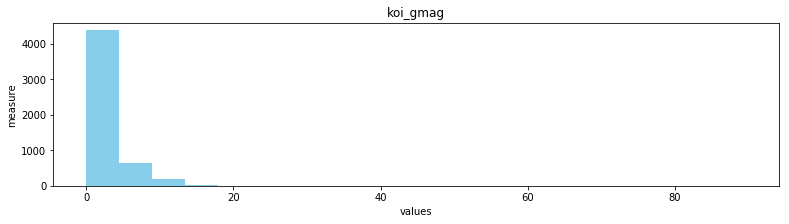

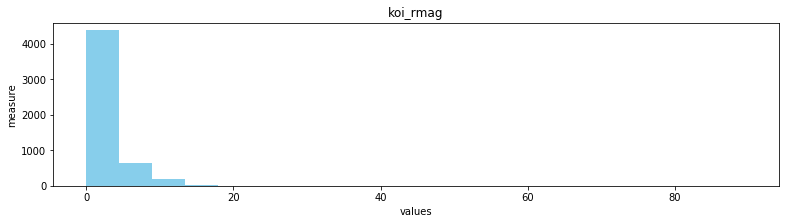

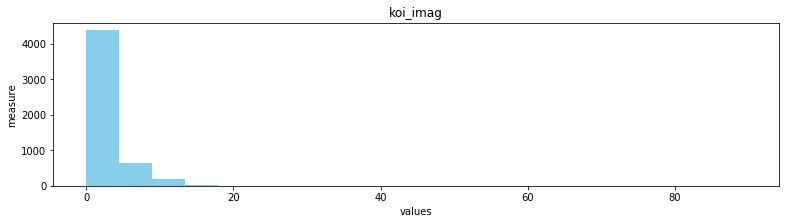

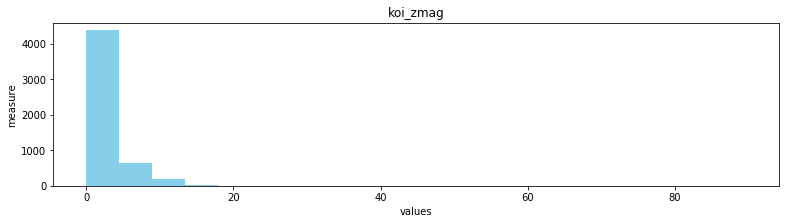

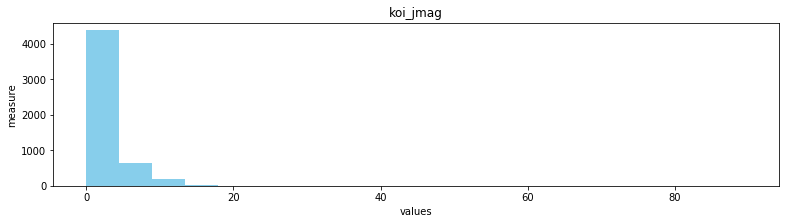

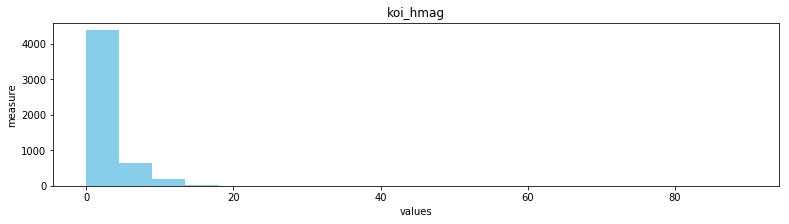

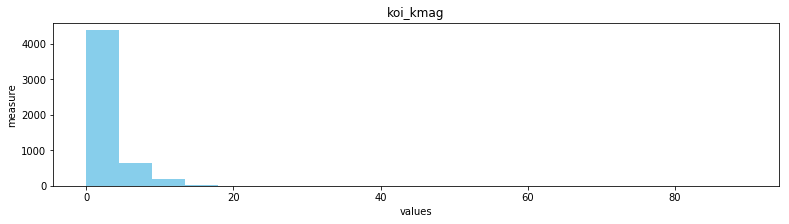

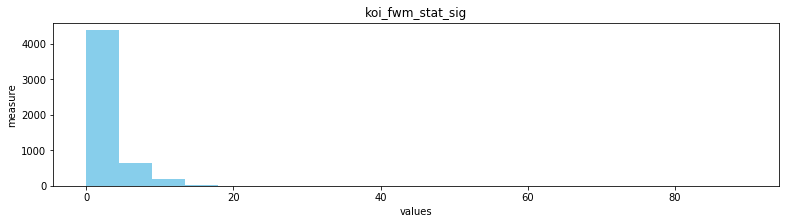

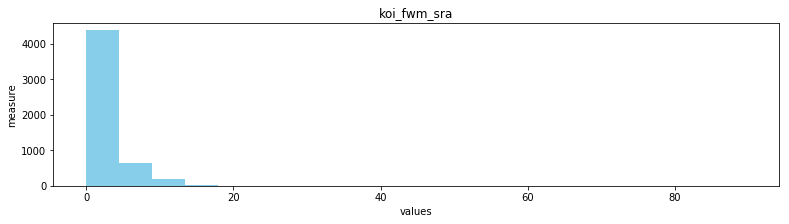

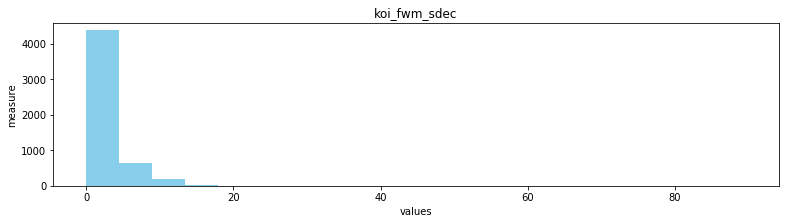

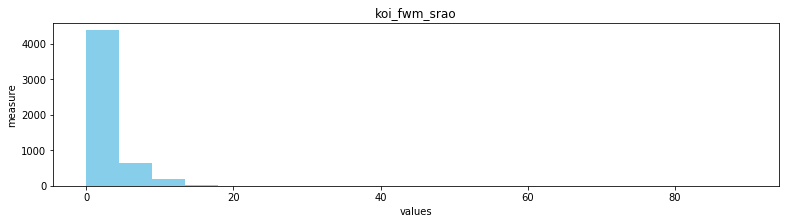

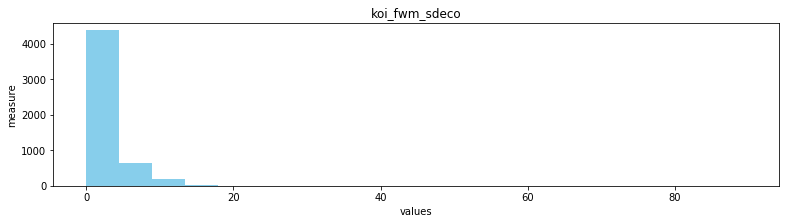

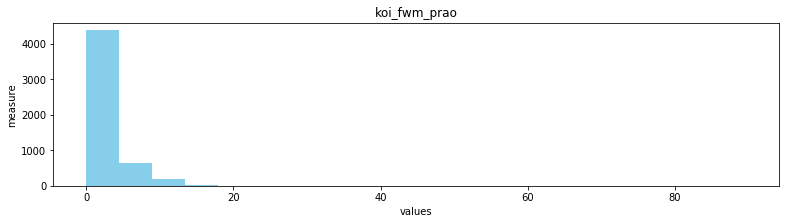

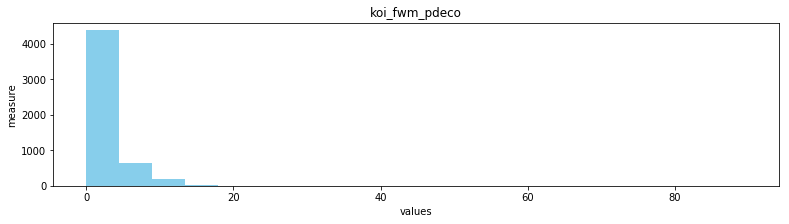

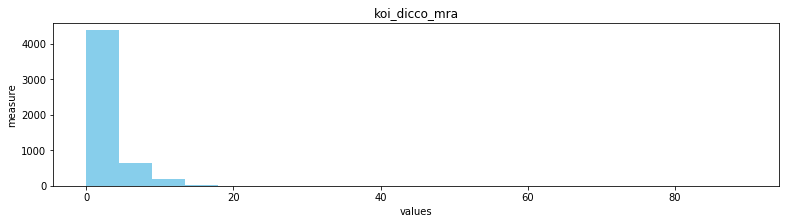

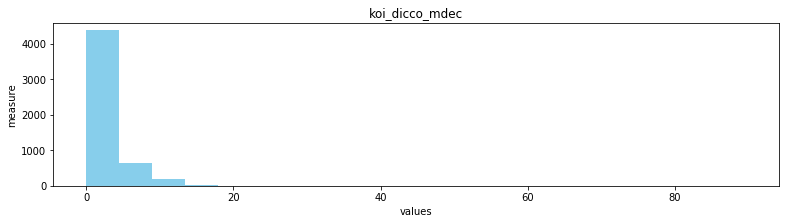

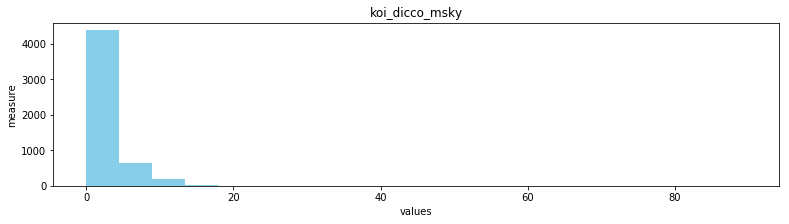

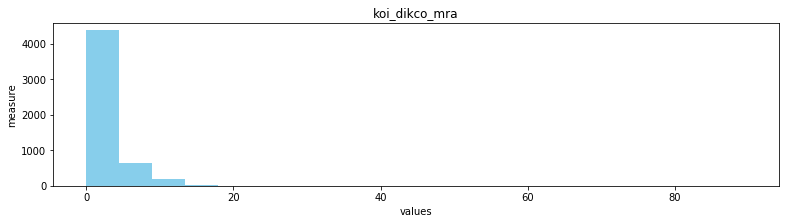

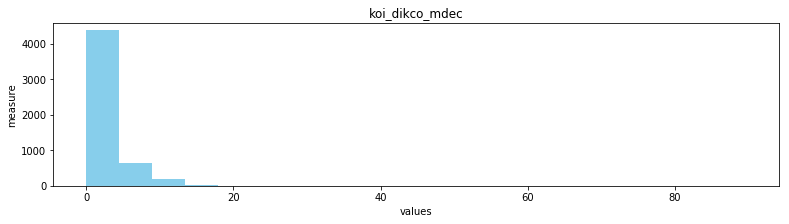

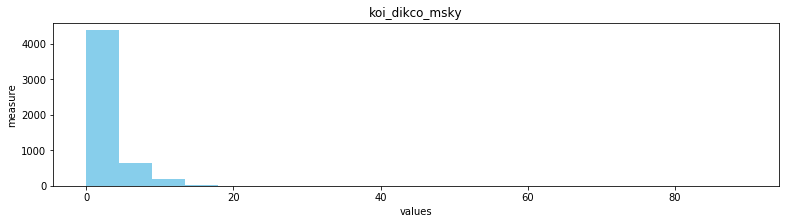

In [114]:
# Numeric datas 
for columns in features:
    plt.figure(figsize=(13, 3))
    plt.hist(df[c], bins=20, color = "skyblue", lw=0)
    plt.title(columns)
    plt.xlabel("values")
    plt.ylabel("measure")
    plt.show()

In [115]:
#Target ratio
display((df[TARGET].value_counts()/len(df)*100).round(2).to_frame(TARGET +" (%)").T)

,FALSE POSITIVE,CONFIRMED
koi_disposition (%),59.55,40.45


In [116]:
df[TARGET] = (df[TARGET] == "CONFIRMED").astype(int)
print("Results:")
display(df[[TARGET]].sample(5))

Results:


,koi_disposition
3168,1
2102,1
2553,1
1805,1
2226,1


In [117]:
# Recreates the list of features
features = list(df.columns)
features.remove(TARGET)

#Mean and Standard deviation
df[features] = df[features] - df[features].mean()
df[features] = df[features] / df[features].std()

print("Results:")
df_mean = df[features].mean().round(2).to_frame("Mean")
df_std = df[features].std().round(2).to_frame("Standard deviation")
with pd.option_context("max_rows", 15):
    display(df_mean.join(df_std))

Results:


,Mean,Standard deviation
koi_period,-0.0,1.0
koi_impact,-0.0,1.0
koi_duration,0.0,1.0
koi_depth,-0.0,1.0
koi_ror,-0.0,1.0
koi_srho,0.0,1.0
koi_prad,0.0,1.0
...,...,...
koi_fwm_pdeco,0.0,1.0
koi_dicco_mra,0.0,1.0
